# CIOPS Parcel Timing

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Offshore

In [2]:
saltdiv=32
to_days = 1.15741*10**-14

meander = 0
init = 1
North = 2
Sshelf = 5
Sslope = 4
Offshore = 3

## summer 2017

In [22]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_30sep17/ariane_positions_quantitative.nc')

In [23]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

monS = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
mon_len = [30, 31, 30, 31, 31, 30]
h = 3601
sum_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
sum_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [24]:
off_age = data.final_age[(data.final_section==Offshore) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])].astype('float')*to_days
north_age = data.final_age[(data.final_section==North) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])].astype('float')*to_days
cuc_age = data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_depth <= -200) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])].astype('float')*to_days
south_age = data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt >= saltdiv) & (data.final_depth > -200) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])].astype('float')*to_days
fresh_age = data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt < saltdiv) & (data.final_depth > -200) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])].astype('float')*to_days
tide=24
loop_age = data.final_age[(data.final_section==0) & (abs(data.init_t-data.final_t) > tide) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])].astype('float')*to_days

In [25]:
time = -(sum_start[2]) + (sum_end[-1]) + 1
off_tr = data.final_transp[(data.final_section==Offshore) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])]/time
north_tr = data.final_transp[(data.final_section==North) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])]/time
cuc_tr = data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_depth <= -200) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])]/time
south_tr = data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt >= saltdiv) & (data.final_depth > -200) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])]/time
fresh_tr = data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt < saltdiv) & (data.final_depth > -200) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])]/time
loop_tr = data.final_transp[(data.final_section==0) & (abs(data.init_t-data.final_t) > tide) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])]/time

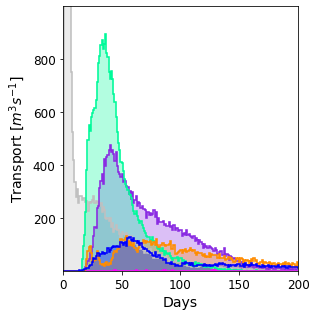

In [27]:
fig, ax = plt.subplots(1,1, figsize = (4.5,4.5))

bins = np.arange(0,300,1)
colours = ['b', 'darkorange', 'magenta', 'mediumspringgreen', 'blueviolet', 'silver']

n, _, _ = ax.hist([cuc_age,south_age,fresh_age, north_age, off_age, loop_age], bins=bins, weights=[cuc_tr, south_tr, fresh_tr, north_tr, off_tr, loop_tr], color = colours, label =['CUC', 'South', 'Columbia River', "North", "Offshore", 'Strait Outflow'], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([cuc_age,south_age,fresh_age, north_age, off_age, loop_age], bins=bins, weights=[cuc_tr, south_tr, fresh_tr, north_tr, off_tr, loop_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax.set_xlabel('Days',fontsize=14)
ax.set_ylabel('Transport [$m^{3}s^{-1}$]',fontsize=14)
ax.set_yticks(np.arange(200,801,200))
ax.set_yticklabels(np.arange(200,801,200),fontsize=12)
ax.set_xticks(np.arange(0,201,50))
ax.set_xticklabels(np.arange(0,201,50),fontsize=12);
ax.set_xlim([0,200])
ax.set_ylim([0,1000])

plt.tight_layout()
plt.savefig("./figures/SummerTime.pdf")

## winter 2016/17

In [13]:
dataS=data
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar17/ariane_positions_quantitative.nc')

In [14]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

mon16 = ['oct16', 'nov16', 'dec16', 'jan17', 'feb17', 'mar17']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [15]:
cuc_age = np.append([data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_t >= win_start[0]) & (data.final_depth <= -200) & (data.init_t <= win_end[-1])]],
                [dataS.final_age[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.final_depth <= -200) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]]).astype('float')*to_days

south_age = np.append([data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt >= saltdiv) & (data.init_t >= win_start[0]) & (data.final_depth > -200) & (data.init_t <= win_end[-1])]],
                  [dataS.final_age[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.init_salt >= saltdiv) & (dataS.init_t >= sum_start[0]) & (dataS.final_depth > -200) & (dataS.init_t <= sum_end[1])]]).astype('float')*to_days

fresh_age = np.append([data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt < saltdiv) & (data.final_depth > -200)& (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_age[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.init_salt < saltdiv) & (dataS.final_depth > -200) &(dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]]).astype('float')*to_days

north_age = np.append([data.final_age[(data.final_section==North) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_age[(dataS.final_section==North) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]]).astype('float')*to_days

offshore_age = np.append([data.final_age[(data.final_section==3) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_age[(dataS.final_section==3) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]]).astype('float')*to_days

tide=24
loop_age = np.append([data.final_age[(data.final_section==0) & (abs(data.init_t-data.final_t) > tide) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_age[(dataS.final_section==0) & (abs(dataS.init_t-dataS.final_t) > tide) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]]).astype('float')*to_days

In [16]:
time = win_end[-1]-win_start[0]+sum_end[1]-sum_start[0]+2
cuc_tr = np.append([data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_t >= win_start[0]) & (data.final_depth <= -200) & (data.init_t <= win_end[-1])]],
                [dataS.final_transp[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.final_depth <= -200) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]])/time

south_tr = np.append([data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt >= saltdiv) & (data.init_t >= win_start[0]) & (data.final_depth > -200) & (data.init_t <= win_end[-1])]],
                  [dataS.final_transp[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.init_salt >= saltdiv) & (dataS.init_t >= sum_start[0]) & (dataS.final_depth > -200) & (dataS.init_t <= sum_end[1])]])/time

fresh_tr = np.append([data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt < saltdiv) & (data.final_depth > -200)& (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_transp[np.logical_or((dataS.final_section==Sshelf),(dataS.final_section==Sslope)) & (dataS.init_salt < saltdiv) & (dataS.final_depth > -200) &(dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]])/time

north_tr = np.append([data.final_transp[(data.final_section==North) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_transp[(dataS.final_section==North) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]])/time

offshore_tr = np.append([data.final_transp[(data.final_section==3) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_transp[(dataS.final_section==3) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]])/time

loop_tr = np.append([data.final_transp[(data.final_section==0) & (abs(data.init_t-data.final_t) > tide) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_transp[(dataS.final_section==0) & (abs(dataS.init_t-dataS.final_t) > tide) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]])/time

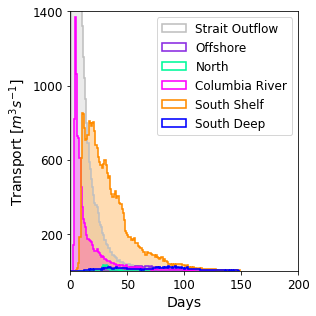

In [21]:
fig, ax = plt.subplots(1,1, figsize = (4.5,4.5))

bins = np.arange(0,150,1)
colours = ['b', 'darkorange', 'magenta', 'mediumspringgreen', 'blueviolet', 'silver']

n, _, _ = ax.hist([cuc_age,south_age,fresh_age, north_age, offshore_age, loop_age], bins=bins, weights=[cuc_tr, south_tr, fresh_tr, north_tr, offshore_tr, loop_tr], color = colours, label =['South Deep', 'South Shelf', 'Columbia River', "North", "Offshore", "Strait Outflow"], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([cuc_age,south_age,fresh_age, north_age, offshore_age, loop_age], bins=bins, weights=[cuc_tr, south_tr, fresh_tr, north_tr, offshore_tr, loop_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax.legend(fontsize=12)
ax.set_xlabel('Days',fontsize=14)
ax.set_ylabel('Transport [$m^{3}s^{-1}$]',fontsize=14)
ax.set_yticks(np.arange(200,1401,400))
ax.set_yticklabels(np.arange(200,1401,400),fontsize=12)
ax.set_xticks(np.arange(0,201,50))
ax.set_xticklabels(np.arange(0,201,50),fontsize=12);
ax.set_xlim([0,200])
ax.set_ylim([0,1400])

plt.tight_layout()
plt.savefig("./figures/W16Time.pdf")

## winter 2017/18

In [28]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_sahubdy_31mar18/ariane_positions_quantitative.nc')

In [29]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

mon17 = ['oct17', 'nov17', 'dec17', 'jan18', 'feb18', 'mar18']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [30]:
north_age = data.final_age[(data.final_section==Offshore) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
off_age = data.final_age[(data.final_section==North) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
cuc_age = data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_depth <= -200) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
south_age = data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt >= saltdiv) & (data.final_depth > -200) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
fresh_age = data.final_age[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt < saltdiv) & (data.final_depth > -200) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
loop_age = data.final_age[(data.final_section==0) & (abs(data.init_t-data.final_t) > tide) & (data.init_t >= win_start[2]) & (data.init_t <= win_end[-1])].astype('float')*to_days

In [31]:
time = -(win_start[0]) + (win_end[-1]) + 1
north_tr = data.final_transp[(data.final_section==Offshore) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
off_tr = data.final_transp[(data.final_section==North) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
cuc_tr = data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.final_depth <= -200) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
south_tr = data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt >= saltdiv) & (data.final_depth > -200) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
fresh_tr = data.final_transp[np.logical_or((data.final_section==Sshelf),(data.final_section==Sslope)) & (data.init_salt < saltdiv) & (data.final_depth > -200) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
loop_tr = data.final_transp[(data.final_section==0) & (abs(data.init_t-data.final_t) > tide) & (data.init_t >= win_start[2]) & (data.init_t <= win_end[-1])]/time

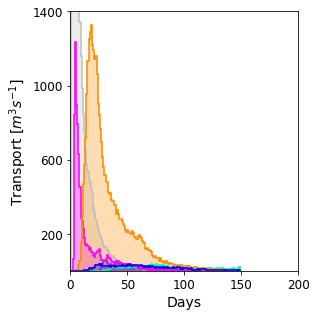

In [33]:
fig, ax = plt.subplots(1,1, figsize = (4.5,4.5))

bins = np.arange(0,150,1)
colours = ['b', 'darkorange', 'magenta', 'mediumspringgreen', 'blueviolet','silver']

n, _, _ = ax.hist([cuc_age,south_age,fresh_age, north_age, off_age, loop_age], bins=bins, weights=[cuc_tr, south_tr, fresh_tr, north_tr, off_tr, loop_tr], color = colours, label =['CUC', 'South', 'Columbia River', "North", "Offshore", "Strait Outflow"], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([cuc_age,south_age,fresh_age, north_age, off_age, loop_age], bins=bins, weights=[cuc_tr, south_tr, fresh_tr, north_tr, off_tr, loop_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax.set_xlabel('Days',fontsize=14)
ax.set_ylabel('Transport [$m^{3}s^{-1}$]',fontsize=14)
ax.set_yticks(np.arange(200,1401,400))
ax.set_yticklabels(np.arange(200,1401,400),fontsize=12)
ax.set_xticks(np.arange(0,201,50))
ax.set_xticklabels(np.arange(0,201,50),fontsize=12);
ax.set_xlim([0,200])
ax.set_ylim([0,1400])

plt.tight_layout()
plt.savefig("./figures/W17Time.pdf")

# Eddy

In [3]:
meander = 0
init = 1
Eddy = 3
Canyon = 4
South = 2

to_days = 1.15741*10**-14

## Summer 2017

In [4]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_30sep17/ariane_positions_quantitative.nc')

In [6]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

monS = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
mon_len = [30, 31, 30, 31, 31, 30]
h = 3601
sum_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
sum_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [7]:
eddy_age = data.final_age[(data.final_section==Eddy) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])].astype('float')*to_days
Canyon_age = data.final_age[(data.final_section==Canyon) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])].astype('float')*to_days
South_age = data.final_age[(data.final_section==South) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])].astype('float')*to_days

In [8]:
time = -(sum_start[2]) + (sum_end[-1]) + 1
South_tr = data.final_transp[(data.final_section==South) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])]/time
Eddy_tr = data.final_transp[(data.final_section==Eddy) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])]/time
Canyon_tr = data.final_transp[(data.final_section==Canyon) & (data.init_t >= sum_start[2]) & (data.init_t <= sum_end[-1])]/time

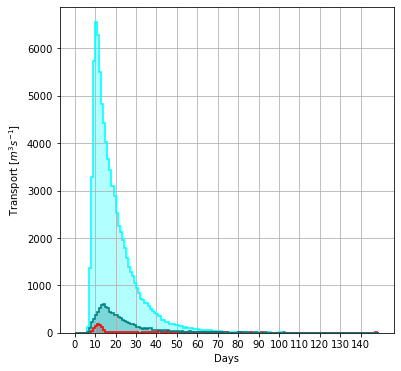

In [12]:
fig, ax = plt.subplots(1,1, figsize = (6,6))

bins = np.arange(0,150,1)
colours = ['teal', 'red', 'cyan']

n, _, _ = ax.hist([Canyon_age,South_age,eddy_age], bins=bins, weights=[Canyon_tr, South_tr, Eddy_tr], color = colours, label =['Canyon', 'South', 'Eddy'], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([Canyon_age,South_age,eddy_age], bins=bins, weights=[Canyon_tr, South_tr, Eddy_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax.set_xlabel('Days')
ax.set_ylabel('Transport [$m^{3}s^{-1}$]')
ax.set_xticks(np.arange(0,150,10))
ax.grid()
# ax.set_ylim([0,1750])

## winter 2016/17

In [24]:
dataS = data
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_31mar17/ariane_positions_quantitative.nc')

In [25]:
mon16 = ['oct16', 'nov16', 'dec16', 'jan17', 'feb17', 'mar17']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [26]:
south_age = np.append([data.final_age[(data.final_section==South) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_age[(dataS.final_section==South) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]]).astype('float')*to_days

eddy_age = np.append([data.final_age[(data.final_section==Eddy) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_age[(dataS.final_section==Eddy) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]]).astype('float')*to_days

Canyon_age = np.append([data.final_age[(data.final_section==Canyon) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_age[(dataS.final_section==Canyon) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]]).astype('float')*to_days

In [27]:
time = win_end[-1]-win_start[0]+sum_end[1]-sum_start[0]+2

South_tr = np.append([data.final_transp[(data.final_section==South) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_transp[(dataS.final_section==South) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]])/time

eddy_tr = np.append([data.final_transp[(data.final_section==Eddy) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_transp[(dataS.final_section==Eddy) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]])/time

Canyon_tr = np.append([data.final_transp[(data.final_section==Canyon) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]],
                  [dataS.final_transp[(dataS.final_section==Canyon) & (dataS.init_t >= sum_start[0]) & (dataS.init_t <= sum_end[1])]])/time

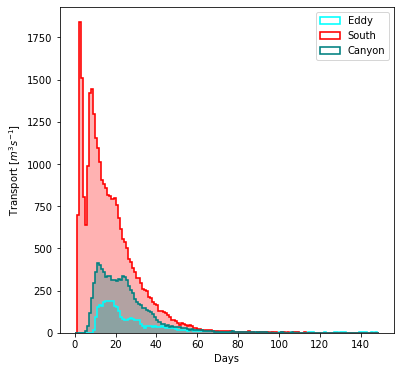

In [28]:
fig, ax = plt.subplots(1,1, figsize = (6,6))

bins = np.arange(0,150,1)
colours = ['teal', 'red', 'cyan']

n, _, _ = ax.hist([Canyon_age,south_age,eddy_age], bins=bins, weights=[Canyon_tr, South_tr, eddy_tr], color = colours, label =['Canyon', 'South', 'Eddy'], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([Canyon_age,south_age,eddy_age], bins=bins, weights=[Canyon_tr, South_tr, eddy_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax.set_xlabel('Days')
ax.set_ylabel('Transport [$m^{3}s^{-1}$]')
ax.legend()
# ax.set_ylim([0,1750])

## winter 2017/18

In [29]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_31mar18/ariane_positions_quantitative.nc')

In [30]:
mon17 = ['oct', 'nov', 'dec', 'jan', 'feb', 'mar']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [31]:
eddy_age = data.final_age[(data.final_section==Eddy) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
Canyon_age = data.final_age[(data.final_section==Canyon) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days
South_age = data.final_age[(data.final_section==South) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])].astype('float')*to_days

In [32]:
time = -(win_start[0]) + (win_end[-1]) + 1
South_tr = data.final_transp[(data.final_section==South) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
Eddy_tr = data.final_transp[(data.final_section==Eddy) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time
Canyon_tr = data.final_transp[(data.final_section==Canyon) & (data.init_t >= win_start[0]) & (data.init_t <= win_end[-1])]/time

Text(0, 0.5, 'Transport [$m^{3}s^{-1}$]')

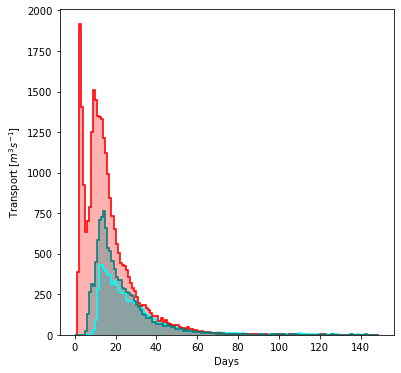

In [33]:
fig, ax = plt.subplots(1,1, figsize = (6,6))

bins = np.arange(0,150,1)
colours = ['teal', 'red', 'cyan']

n, _, _ = ax.hist([Canyon_age,South_age,eddy_age], bins=bins, weights=[Canyon_tr, South_tr, Eddy_tr], color = colours, label =['Canyon', 'South', 'Eddy'], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax.hist([Canyon_age,South_age,eddy_age], bins=bins, weights=[Canyon_tr, South_tr, Eddy_tr], color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax.set_xlabel('Days')
ax.set_ylabel('Transport [$m^{3}s^{-1}$]')
# ax.set_ylim([0,1750])